Extraction figure : Pmbok
**texte en gras**


In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr
!pip install PyMuPDF

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pytesseract

#import pytesseract

# Set the Tesseract executable path (replace with your actual path)
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Rest of your code for text extraction

def extraire_txt_image(image):
    # Load the image
    #image = cv2.imread('/content/cropped_images/2.png')
    image=image
    # Preprocess the image as needed (e.g., resizing, smoothing, contrast enhancement)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size (adjust the size threshold as needed)
    min_contour_area = 1000  # Minimum contour area to consider
    min_contour_height = 50  # Minimum contour height to consider
    min_contour_width = 50   # Minimum contour width to consider

    filtered_contours = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if cv2.contourArea(contour) > min_contour_area and h > min_contour_height and w > min_contour_width:
            filtered_contours.append(contour)

    # Create a blank canvas to draw the bounding contour
    contour_canvas = np.zeros_like(image)

    # Draw a bounding contour around the filtered contours
    for contour in filtered_contours:
        cv2.drawContours(contour_canvas, [contour], -1, (0, 255, 0), 2)

    # Find the bounding rectangle that covers all the filtered contours
    x, y, w, h = cv2.boundingRect(np.vstack(filtered_contours))


    # Ensure that the coordinates are within the image boundaries
    x = max(0, x)
    y = max(0, y)
    w = min(w, image.shape[1] - x)
    h = min(h, image.shape[0] - y)

    # Draw a contour around the modified bounding rectangle
    bounding_contour = np.array([[[x, y]], [[x + w, y]], [[x + w, y + h]], [[x, y + h]]])
    cv2.drawContours(contour_canvas, [bounding_contour], -1, (0, 0, 255), 2)

    # Create a mask for the area inside the bounding_contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [bounding_contour], -1, 255, thickness=cv2.FILLED)

    # Invert the mask to get the area outside the bounding_contour
    mask = 255 - mask

    # Apply the inverted mask to the grayscale image
    outside_text = cv2.bitwise_and(gray, gray, mask=mask)

    # Use Tesseract to extract text from the outside_text image
    extracted_text = pytesseract.image_to_string(outside_text)

    # Print the extracted text
    #print(extracted_text)
    #cv2_imshow(mask)
    #cv2_imshow(contour_canvas)
    return extracted_text
    # Display the result with the bounding contour using cv2_imshow
    #cv2_imshow(contour_canvas)
def extraire_txt_image2(image):
    # Load the image
    #image = cv2.imread('/content/cropped_images/2.png')
    image=image
    # Preprocess the image as needed (e.g., resizing, smoothing, contrast enhancement)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size (adjust the size threshold as needed)
    min_contour_area = 1000  # Minimum contour area to consider
    min_contour_height = 50  # Minimum contour height to consider
    min_contour_width = 50   # Minimum contour width to consider

    filtered_contours = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if cv2.contourArea(contour) > min_contour_area and h > min_contour_height and w > min_contour_width:
            filtered_contours.append(contour)

    # Create a blank canvas to draw the bounding contour
    contour_canvas = np.zeros_like(image)

    # Draw a bounding contour around the filtered contours
    for contour in filtered_contours:
        cv2.drawContours(contour_canvas, [contour], -1, (0, 255, 0), 2)

    # Find the bounding rectangle that covers all the filtered contours
    x, y, w, h = cv2.boundingRect(np.vstack(filtered_contours))


    # Ensure that the coordinates are within the image boundaries
    x = max(0, x)
    y = max(0, y)
    w = min(w, image.shape[1] - x)
    h = min(h, image.shape[0] - y)
    x -= 50
    y -= 75
    w += 200
    h += 200

    # Draw a contour around the modified bounding rectangle
    bounding_contour = np.array([[[x, y]], [[x + w, y]], [[x + w, y + h]], [[x, y + h]]])
    cv2.drawContours(contour_canvas, [bounding_contour], -1, (0, 0, 255), 2)

    # Create a mask for the area inside the bounding_contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [bounding_contour], -1, 255, thickness=cv2.FILLED)

    # Invert the mask to get the area outside the bounding_contour
    mask = 255 - mask

    # Apply the inverted mask to the grayscale image
    outside_text = cv2.bitwise_and(gray, gray, mask=mask)

    # Use Tesseract to extract text from the outside_text image
    extracted_text = pytesseract.image_to_string(outside_text)

    # Print the extracted text
    #print(extracted_text)
    #cv2_imshow(mask)
    #cv2_imshow(contour_canvas)
    return extracted_text
    # Display the result with the bounding contour using cv2_imshow
    #cv2_imshow(contour_canvas)
def extraire_txt_image3(image):
  # Extract text from the image
  return pytesseract.image_to_string(image)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def extract_charts_from_image(img):
    # Load the image
    #image = cv2.imread(img)
    image=img
    # Preprocess the image as needed (e.g., resizing, smoothing, contrast enhancement)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size (adjust the size threshold as needed)
    min_contour_area = 1000  # Minimum contour area to consider
    min_contour_height = 50  # Minimum contour height to consider
    min_contour_width = 100   # Minimum contour width to consider

    filtered_contours = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if cv2.contourArea(contour) > min_contour_area and h > min_contour_height and w > min_contour_width:
            filtered_contours.append(contour)
    if len(filtered_contours)>0:
      # Find the bounding rectangle that covers all the filtered contours
      x, y, w, h = cv2.boundingRect(np.vstack(filtered_contours))

      # Add 100 pixels to all sides of the bounding rectangle
      x -= 50
      y -= 80
      w += 200
      h += 200

      # Crop the portion of the image inside the modified bounding rectangle
      cropped_image = image[y:y+h, x:x+w]

      # Display the cropped image using cv2_imshow
      #cv2_imshow(cropped_image)
      return cropped_image
      # Save the cropped image if needed
      #cv2.imwrite('/content/cropped_images/'+str(page_number)+'.png', cropped_image)
    else :
      #print("bahhhh")
      return 0


In [ ]:
import os
import fitz
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

def display_pdf_images(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    mahabnich=[]
    txt=""
    for page_number in range(len(pdf_document)):
        # Get a specific page
        page = pdf_document.load_page(page_number)

        # Convert the page to an image (300 DPI)
        pix = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72))

        # Convert the PyMuPDF image to a Pillow image
        img_pil = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

        # Convert Pillow image to NumPy array (imread type)
        img_cv2 = np.asarray(img_pil)
        veto=extract_charts_from_image(img_cv2)
        #print(veto)
        if isinstance(veto, int):
          txt=txt+"\n"+extraire_txt_image3(img_cv2)
        else:
          #cv2_imshow(veto)
          #extraire_txt_image(veto)
          mahabnich.append([extraire_txt_image(veto),veto])
          txt=txt+"\n"+extraire_txt_image(img_cv2)

        #mahabnich.append(extract_charts_from_image(img_cv2))

        # Display the image using Colab's cv2_imshow
        #cv2_imshow(img_cv2)

    # Close the PDF file
    pdf_document.close()
    return (mahabnich,txt)
# Example usage

#pdf_path = '/content/PMBOK6-2017-431-494.pdf'
#mahabnich=display_pdf_images(pdf_path)


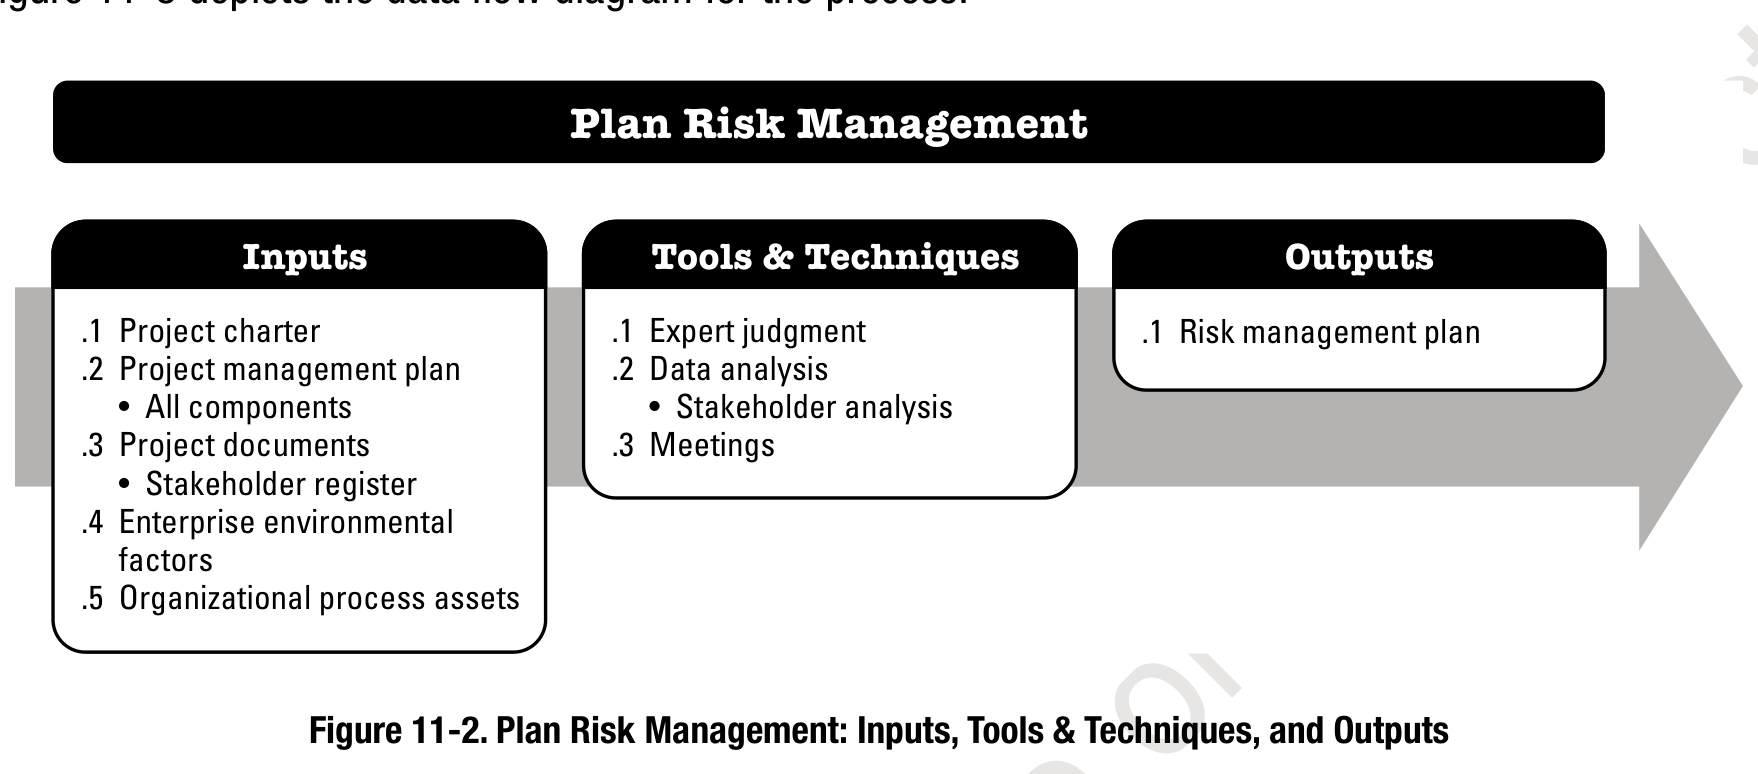

In [ ]:
cv2_imshow(mahabnich[0][1][1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
output_file_path = '/content/extracted_text_Pmbok.txt'

# Save the extracted text to a .txt file
with open(output_file_path, 'w') as text_file:
    text_file.write(mahabnich[1])

# **Extraction PMI**

In [ ]:
pdf_path = '/content/PMI.pdf'
PMI_figures=display_pdf_images(pdf_path)

In [ ]:
cv2_imshow(PMI_figures[0][10][1])

In [ ]:

# Extract PMI

pdf_path = '/content/PMI.pdf'
mahabnich=display_pdf_images(pdf_path)


In [ ]:
output_file_path = '/content/extracted_text_PMI.txt'

# Save the extracted text to a .txt file
with open(output_file_path, 'w') as text_file:
    text_file.write(mahabnich[1])